In [1]:
# Note: You can select "GPU" on your Notebook
# Click "Runtime > Change runtime type" and select "T4 GPU"

In [2]:
#Uncomment to install the ydata-synthetic package
#!pip install ydata-synthetic==1.3.1

# Time Series Synthetic Data Generation with DoppelGANger

- DoppelGANger - Implemented accordingly to the [paper](https://dl.acm.org/doi/pdf/10.1145/3419394.3423643)
- This notebook is an example of how DoppelGANger can be used to generate synthetic time-series data

## Dataset

- The data used in this notebook is the [Measuring Broadband America](https://www.fcc.gov/reports-research/reports/measuring-broadband-america/raw-data-measuring-broadband-america-seventh) (MBA) Dataset, freely available on the Federal Communications Commission (FCC) website. You can also find it [here](https://drive.google.com/drive/folders/19hnyG8lN9_WWIac998rT6RtBB9Zit70X) and a CVS was left for your convenience [here](https://github.com/ydataai/ydata-synthetic/blob/dev/data/fcc_mba.csv). It comprises:
    - **2 continuous measurements** - traffic_byte_counter and ping_loss_rate
    - **3 categorical metadata features** - isp, technology, and state

In [3]:
!pip install ydata-synthetic==1.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.7/280.7 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Fou

In [58]:
# Importing the necessay modules
import pandas as pd
import matplotlib.pyplot as plt
from ydata_synthetic.synthesizers.timeseries import TimeSeriesSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters

In [5]:
# Read the data
mba_data = pd.read_csv("fcc_mba.csv")
numerical_cols = ["traffic_byte_counter", "ping_loss_rate"]
categorical_cols = [col for col in mba_data.columns if col not in numerical_cols]

In [6]:
# Preview the dataset
mba_data.head(10)

,traffic_byte_counter,ping_loss_rate,isp,technology,state
0,0.001903,0.0,CenturyLink,Fiber,MN
1,0.005421,0.0,CenturyLink,Fiber,MN
2,0.003513,0.0,CenturyLink,Fiber,MN
3,0.003307,0.0,CenturyLink,Fiber,MN
4,0.002243,0.0,CenturyLink,Fiber,MN
5,0.005589,0.0,CenturyLink,Fiber,MN
6,0.003436,0.0,CenturyLink,Fiber,MN
7,0.006160,0.0,CenturyLink,Fiber,MN
8,0.002327,0.0,CenturyLink,Fiber,MN
9,0.004787,0.0,CenturyLink,Fiber,MN


In [59]:
# Defining model and training parameters
model_args = ModelParameters(batch_size=100,
                             lr=0.001,
                             betas=(0.2, 0.9),
                             latent_dim=20,
                             gp_lambda=2,
                             pac=1)

train_args = TrainParameters(epochs=400,
                             sequence_length=56,
                             sample_length=8,
                             rounds=1,
                             measurement_cols=["traffic_byte_counter", "ping_loss_rate"])

In [8]:
# Training the DoppelGANger synthesizer
model_dop_gan = TimeSeriesSynthesizer(modelname='doppelganger',model_parameters=model_args)
model_dop_gan.fit(mba_data, train_args, num_cols=numerical_cols, cat_cols=categorical_cols)

/usr/local/lib/python3.10/dist-packages/ydata_synthetic/synthesizers/timeseries/doppelganger/network.py:13: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output = tf.compat.v1.layers.dense(
Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.10/dist-packages/ydata_synthetic/synthesizers/timeseries/doppelganger/network.py:274: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
100%|██████████| 400/400 [04:36<00:00,  1.45it/s]


In [44]:
# Generating new synthetic samples
synth_data = model_dop_gan.sample(n_samples=600)
synth_df = pd.concat(synth_data, axis=0)

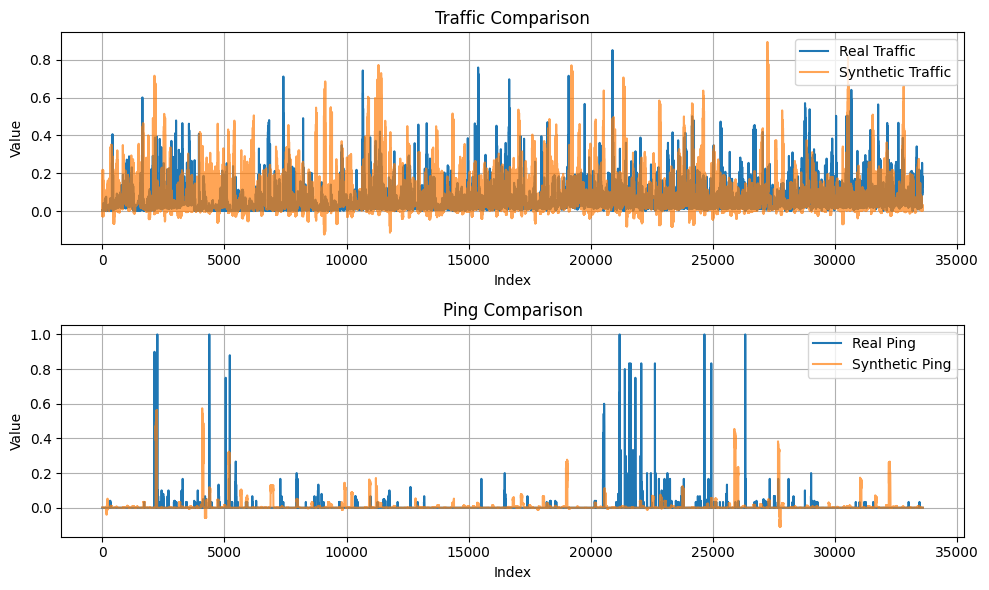

In [45]:
# Create a plot for each measurement column
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(mba_data['traffic_byte_counter'].reset_index(drop=True), label='Real Traffic')
plt.plot(synth_df['traffic_byte_counter'].reset_index(drop=True), label='Synthetic Traffic', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Traffic Comparison')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(mba_data['ping_loss_rate'].reset_index(drop=True), label='Real Ping')
plt.plot(synth_df['ping_loss_rate'].reset_index(drop=True), label='Synthetic Ping', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ping Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
# Divide original data into sequences
sequence_lenght = 56
mba_sequences = []

for i in range(0, len(mba_data), sequence_lenght):
    sequence = mba_data.iloc[i:i+sequence_lenght]
    mba_sequences.append(sequence)

print(f"Number of sequences: {len(mba_sequences)}")
print(f"Size of each sequence: {mba_sequences[0].shape} (rows x columns)")

Number of sequences: 600
Size of each sequence: (56, 5) (rows x columns)


In [31]:
# Choose a random sequence
import numpy as np

In [56]:
obs = np.random.randint(len(mba_sequences))
print(obs)

404


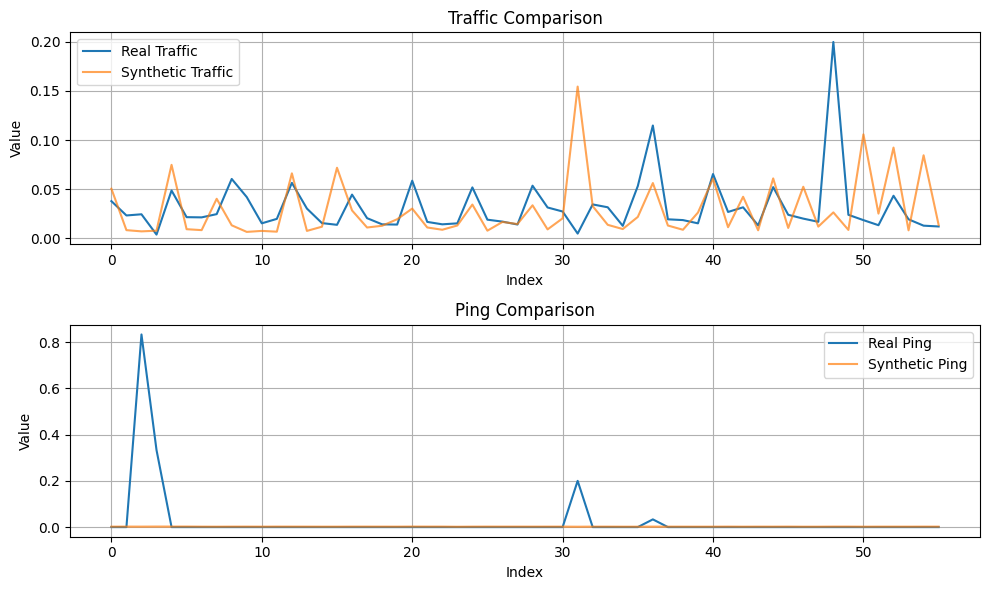

In [57]:
# Create a plot for each measurement column
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(mba_sequences[obs]['traffic_byte_counter'].reset_index(drop=True), label='Real Traffic')
plt.plot(synth_data[obs]['traffic_byte_counter'].reset_index(drop=True), label='Synthetic Traffic', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Traffic Comparison')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(mba_sequences[obs]['ping_loss_rate'].reset_index(drop=True), label='Real Ping')
plt.plot(synth_data[obs]['ping_loss_rate'].reset_index(drop=True), label='Synthetic Ping', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ping Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [63]:
synth_df.to_csv('synthetic_mba.csv', index=False)